[Home data for ml course](https://www.kaggle.com/c/home-data-for-ml-course/overview)

Submission #1 is in a notebook called [Exercise_ Machine Learning Competitions](kaggle/first-model/Exercise_ Machine Learning Competitions.ipynb). It uses RandomForest with default hyperparameter settings on a pre-selected set of features. 

In submission #2, I am going to try to improve on the results from the first submission by:

* Exploratory Data Analysis to select and possibly create useful features. 
* Use top-two correlated features in RandomForest and compute mean squared error. 
* Use top-six correlated features in RandomForest and compute mean squared error. 
* Pick best of these two.
* Add a few categorical features that appear to provide distinguishing information for `SalePrice`.
* Add `TotalSF` column, add as a feature and compute mse. 
* Use cross-validation to expose the model to more data during training. Determine its effect on mean squared error.
* Play with hyperparameter settings manually.
* Try to automate hyperparameter optimisation. 
* Select a few additional algorithms to apply to the problem.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [44]:
iowa_file_path = 'data/train.csv'

home_data = pd.read_csv(iowa_file_path)

In [45]:
iowa_test_file_path = "data/test.csv"
home_data_test = pd.read_csv(iowa_test_file_path)

In [46]:
home_data.sample(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500
952,953,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,133900
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
213,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,156000
586,587,30,RL,55.0,10267,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,5,2008,WD,Normal,130000
589,590,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
745,746,60,RL,NaN,8963,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,299800
783,784,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,165500
863,864,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal,132500
513,514,20,RL,71.0,9187,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,134000


In [5]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# YearBuilt

Want to know:
* Distribution of values. 
* Correlation with `SalePrice`.

In [6]:
home_data["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Looks like available data in the training dataset stops in 2010. 

In [7]:
home_data_test["YearBuilt"].describe()

count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Test dataset ends in 2010 as well.

Plotting how many houses were built in each year, we find three peaks with most significant one starting at around year 2000.

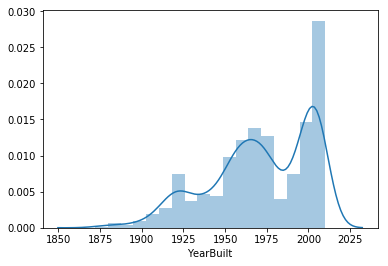

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(home_data["YearBuilt"], kde=True, ax=ax)

How many houses were sold each year?

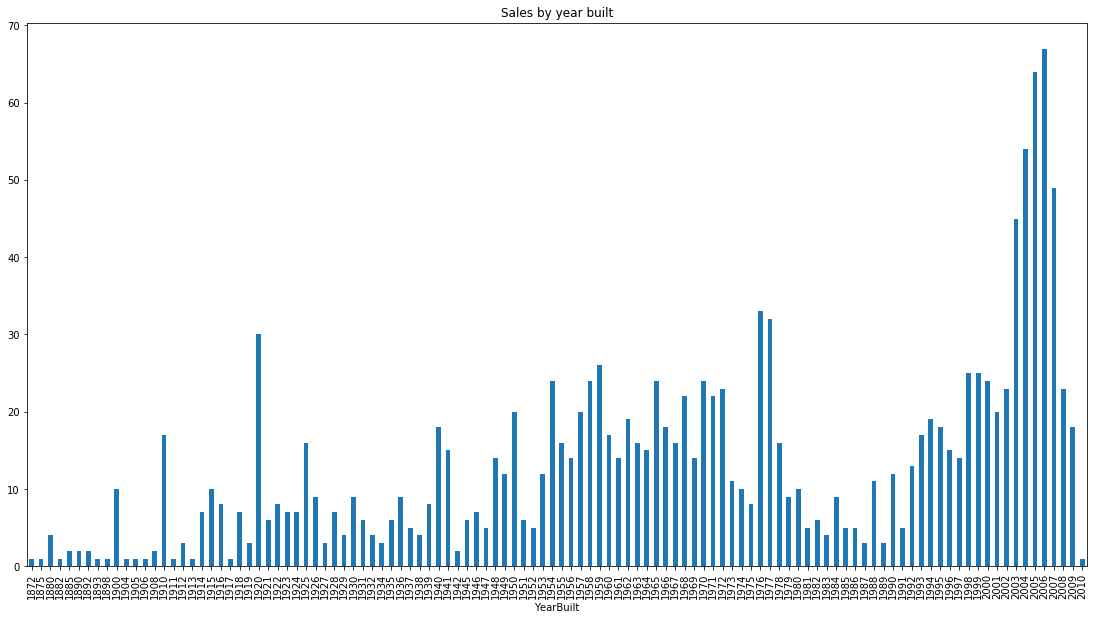

In [9]:
# Number of sales by year
home_data.groupby("YearBuilt")["SalePrice"].count().plot(kind="bar", title="Sales by year built", figsize=(19, 10))

What are the average sales prices given the year a house was built?

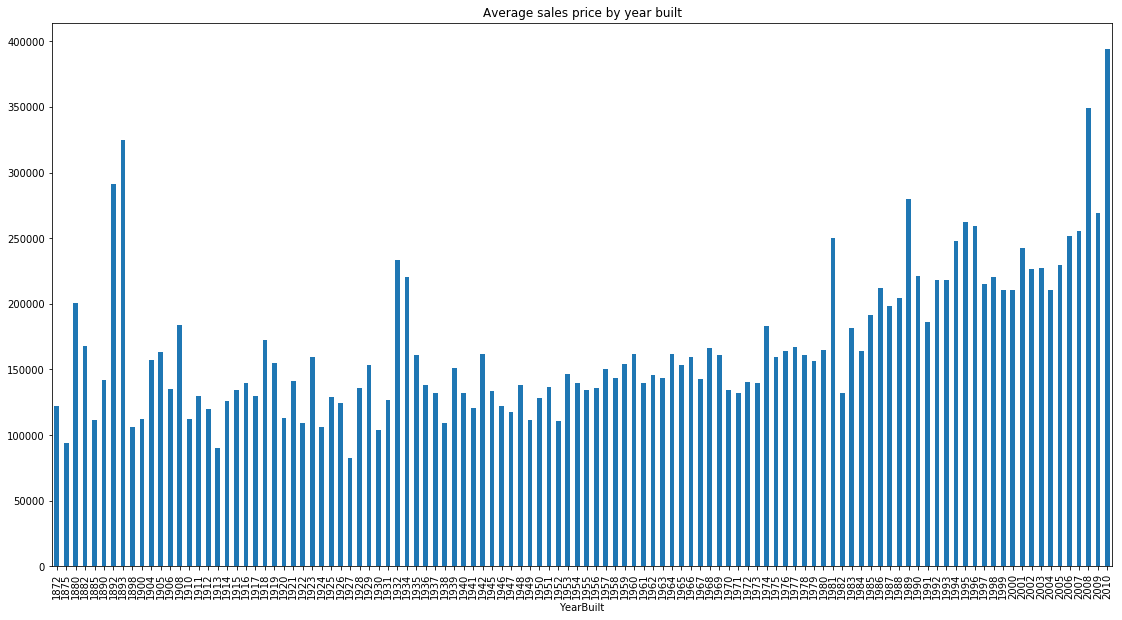

In [10]:
# Average sale price by year built
home_data.groupby("YearBuilt")["SalePrice"].mean().plot(
    kind="bar", title="Average sales price by year built", figsize=(19, 10))

Maybe try to fit a trend line to this bar chart. It looks like there is an upward trend over the years for the given period.

# YrSold

Want to know:
* Distribution of values. 
* Correlation with `SalePrice`.

In [11]:
home_data["YrSold"].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [12]:
home_data_test["YrSold"].describe()

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

The range of data for `YrSold` is 2006 to 2010.

How many houses were sold each year?

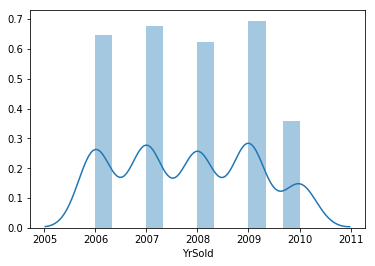

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(home_data["YrSold"], kde=True, ax=ax)

We find similar numbers of houses sold in in 2006, 2007, 2008 and 2009. It looks like there is not data for 2005 and that there is only data for some part of 2010. 

How have sales prices developed by year sold?

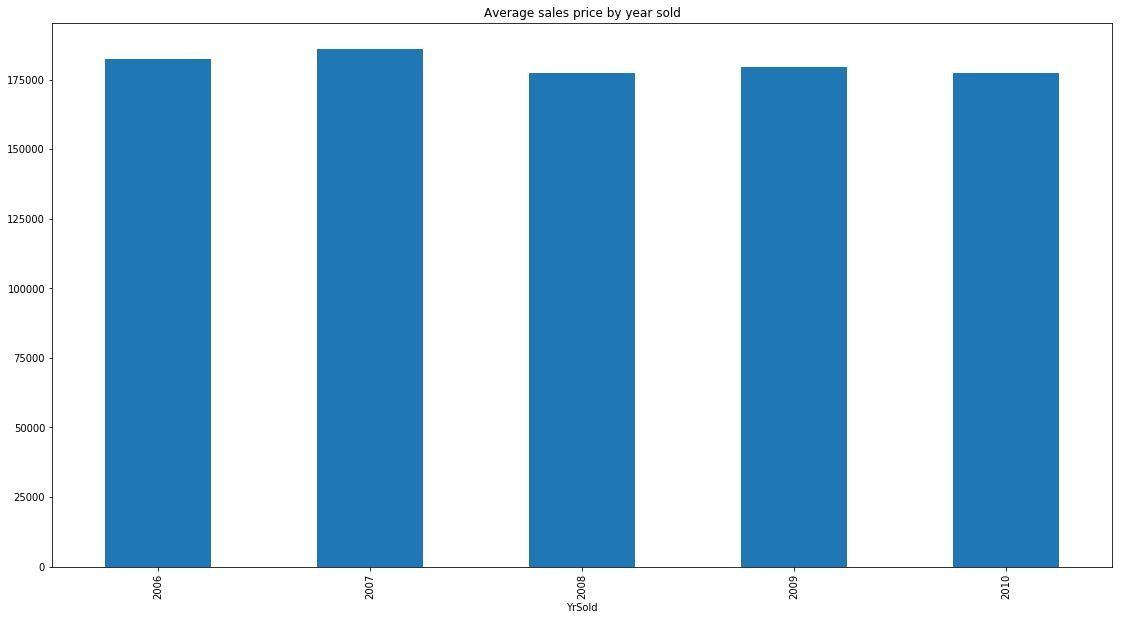

In [13]:
# Average sale price by year sold
home_data.groupby("YrSold")["SalePrice"].mean().plot(
    kind="bar", title="Average sales price by year sold", figsize=(19, 10))

No significant differences in average sales price by year in which a property was sold.

# Correlations

Go fishing for some features that may be correlated strongly with sales price.

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
# Get names of columns containing categorical data
cat_cols = [col for col in home_data.columns if home_data[col].dtype not in ["float64", "int64"]]
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
home_data.drop(cat_cols, axis=1).apply(lambda x: x.corr(home_data["SalePrice"])).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

There are two features with a correlation of at least 0.7 with `SalePrice` and four features with a correlation of less than 0.7, but more than 0.6. I think I would like to see what effect these may have on prediction accuracy. 

# Square Footage

One idea I had was to accumulate all the values for columns containing square footage into a new feature. Property prices are usually per square foot, so it seems to make sense that larger values of square footage are associated with higher sales prices. Will combine this into a single feature to reduce the number of features for the same information content. 

**Add a column for total square footage and check its distribution and correlation with sales price.**

In [17]:
sft_cols = [c for c in home_data.columns if "SF" in c]
sft_cols
home_data[sft_cols].sample(5)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF
687,239,0,312,551,551,551,0,0,60
1154,454,0,410,864,902,918,0,60,84
1183,821,0,299,1120,1130,0,0,229,0
675,311,0,544,855,855,586,0,28,0
1215,180,374,340,894,894,0,0,0,0


In [18]:
testidea = pd.DataFrame()
testidea["TotalSF"] = home_data[sft_cols].sum(axis=1)
testidea.sample(10)

,TotalSF
489,1890
1107,3857
210,2592
1155,4332
98,1751
163,2646
967,3294
1035,1031
267,3918
301,4766


# LotArea

In [35]:
home_data["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [36]:
home_data["LotArea"].corr(home_data["SalePrice"])

0.2638433538714056

Looks like relatively weak correlation between `LotArea` and `SalePrice`.

**Things to try:**
* First, continue EDA (cf. below).
* Use top-two correlated features in RandomForest and compute mean squared error. 
* Use top-six correlated features in RandomForest and compute mean squared error. 
* Pick best of these two.
* Add `TotalSF` column, add as a feature and compure mse. 
* Play with hyperparameter settings manually.
* Try to automate hyperparameter optimisation. 
* Before that may want to implement cross-validation and its effect on mse.

# Categorical columns

* What are their unique values? 
* What are the proportions of their unique value?
* What is the correlation between their values and `SalePrice`?

In [34]:
for col in cat_cols:
    print(f"{col}:\n Unique Values:\n{home_data[col].unique()}\n")
    print(f"{home_data[col].value_counts(ascending=False, dropna=False, normalize=True)}\n")
    print(f"{home_data.groupby(col)['SalePrice'].mean().sort_values(ascending=False)}")
    print("*" * 35 + "\n")

MSZoning:
 Unique Values:
['RL' 'RM' 'C (all)' 'FV' 'RH']

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64
***********************************

Street:
 Unique Values:
['Pave' 'Grvl']

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64
***********************************

Alley:
 Unique Values:
[nan 'Grvl' 'Pave']

NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64

Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64
***********************************

LotShape:
 Unique Values:
['Reg' 'IR1' 'IR2' 'IR3']

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: 


KitchenQual
Ex    328554.670000
Gd    212116.023891
TA    139962.511565
Fa    105565.205128
Name: SalePrice, dtype: float64
***********************************

Functional:
 Unique Values:
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

Functional
Typ     183429.147059
Mod     168393.333333
Maj1    153948.142857
Min1    146385.483871
Min2    144240.647059
Sev     129000.000000
Maj2     85800.000000
Name: SalePrice, dtype: float64
***********************************

FireplaceQu:
 Unique Values:
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

NaN    0.472603
Gd     0.260274
TA     0.214384
Fa     0.022603
Ex     0.016438
Po     0.013699
Name: FireplaceQu, dtype: float64

FireplaceQu
Ex    337712.500000
Gd    226351.415789
TA    205723.488818
Fa    167298.484848
Po    129764.150000
Name: SalePrice, dtype: float64
***********************************

G

List of categorical features whose values appear somewhat correlated with different values of `SalePrice`:
* `Street` values have significant differences in `SalePrice`, but almost all samples are for just one value.
* `Alley` ditto.
* `Neighborhood` may have a useful association with `SalePrice`. At least that's how it works in the real world (i.e. some neighbourhoods are more expensive than others). In the data, there is a wide range in average sales prices by neigbourhood. For example, the top-three neighbourhoods have a significantly higher average sales price than the next three and so on. 
* `Condition2` seems to have strong differences in average sales prices by its values.
* `HouseStyle` appears useful.
* `RoofMat1`. 
* `Exterior2nd`.
* `MasVnrType`.
* `ExterQual` looks great as a factor to distinguish sales prices. 
* `BsmtQual` looks good as well.
* `Heating` has two groups. 
* `CentralAir` looks to have good distinguishing power.
* `KitchenQual` might be useful.
* `FireplaceQu`.
* `GarageFin`.
* `PoolQC` seems to have power.


# RandomForest model 2
Use the two continuous variables that have strongest correlation with sales price to build another random forest model. 

`OverallQual` and `GrLivArea`

In [6]:
# Create target variable y
y = home_data.SalePrice

# Create feature vector X
features = ["OverallQual", "GrLivArea"]
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model # 2: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 27,675


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


This is worse than my previous submission. The mean squared error to beat is 22,762.

# RandomForest model 3
Try adding the next four variables by correlation: `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`.

In [7]:
# Create target variable y
y = home_data.SalePrice

# Create feature vector X
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model # 3: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model # 3: 21,698


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*Bingo!* This one is an improvement over our previous model.

# RandomForest model 4
Another try adding `LotArea` to the feature vector.

In [15]:
# Create target variable y
y = home_data.SalePrice

# Create feature vector X
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "LotArea"]
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model # 4: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model # 4: 20,825


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Even better :-)

Preparing another submission...

In [25]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
# Decided to handle missing values for some columns by replacing them with the value 0. 
test_X = home_data_test[features]
test_X.columns[test_X.isna().any()].tolist()
test_X.fillna(0, inplace=True)
test_X.columns[test_X.isna().any()].tolist()

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

output = pd.DataFrame({'Id': home_data_test.Id,
                       'SalePrice': test_preds})
output.to_csv('out/submission-2.csv', index=False)

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


# RandomForest model 5
For this one, I am experimenting with a few of the categorical variables that appear to distinguish among average sales prices. Need to encode the categorical values.

I know two approaches to convert categorical data for use by ml algorithms: label encoding and one-hot encoding. 

With label encoding, we convert the type of the column to `category` and then create a new column containing numeric representations of its categorical values using `cat.codes`. For example, if the `body_style` column contains `{convertible, hatchback, sedan, ...}`, then this will be turned in `{0, 1, 2, ...}` respectively.
```python
df["body_style"] = df["body_style"].astype("category")
df["body_style_cat"] df["body_style"].cat.codes
```

This represents a fairly simple approach that does not add a lot of additional data. However, the numerical values can be misinterpreted by algorithms (e.g., is a sedan twice as expensive, heavy, etc. than a hatchback). 

One-hot encoding is an alternative approach. Each category value is turned into new column with the value `{1|0}` or `{True|False}`. 

In [64]:

pd.options.display.max_columns = None


# Create target variable y
y = home_data.SalePrice

# Create feature vector X
features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "LotArea",
           "Neighborhood"]
X = home_data[features]

# one-hot encoding of the desired categorical column, dropping the colume from the feature vector after encoding it
one_hot_encoded = pd.get_dummies(X["Neighborhood"])
X.drop("Neighborhood", axis=1, inplace=True)
X = X.join(one_hot_encoded)

#X.head()

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model # 5: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model # 5: 20,276


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


This improved things a little bit. I will experiment with a few other categorical features, but will prepare another submission using `Neigborhood` for now.

In [67]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
# Decided to handle missing values for some columns by replacing them with the value 0. 
test_X = home_data_test[features]
test_X.columns[test_X.isna().any()].tolist()
test_X.fillna(0, inplace=True)
one_hot_encoded = pd.get_dummies(test_X["Neighborhood"])
test_X.drop("Neighborhood", axis=1, inplace=True)
test_X = test_X.join(one_hot_encoded)
test_X.columns[test_X.isna().any()].tolist()

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

output = pd.DataFrame({'Id': home_data_test.Id,
                       'SalePrice': test_preds})
output.to_csv('out/submission-3.csv', index=False)

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
